# Homework Set 6

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 7, 15:00**.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

MeifangLi_13043390
YuhaoQian_13011456

Run the following cell to import the necessary packages.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import integrate


# Exercise 1



Runge's function is given by

$$ f(t) = 1/(1+25t^2).$$

# (a)
Interpolate Runge's function on $[-1,1]$ by a polynomial $p_k$ of degree $k$ for $k = 5,10,15$. Use equally spaced interpolation points. Draw your interpolating polynomials together with $f$.

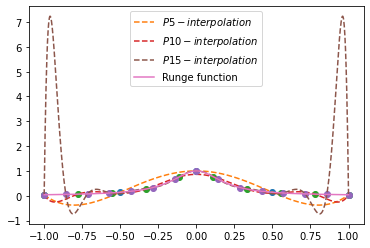

In [2]:
#YOUR ANSWER HERE
def Runge(t):
    return 1/(1+25*t**2)

X=np.linspace(-1,1,1000,endpoint=True)
Y=[Runge(x) for x in X]
for k in [5,10,15]:
    xi = np.linspace(-1, 1, k, endpoint=True)
    yi = [Runge(x) for x in xi]
    f1 = interpolate.lagrange(xi, yi)
    plt.plot(xi,yi,'o')
    plt.plot(X,f1(X),'--',label=r'$P%d-interpolation$'%(k))
plt.plot(X,Y,label='Runge function')
plt.legend(loc='upper center')
plt.show()



# (b)
Repeat (a) to find polynomials $q_k$. This time use the Chebyshev points as interpolation points. They are given by

$$t_i = \cos \left( \frac{(2i-1)\pi}{2k+2} \right),\, \,i = 1,\ldots,k+1.$$

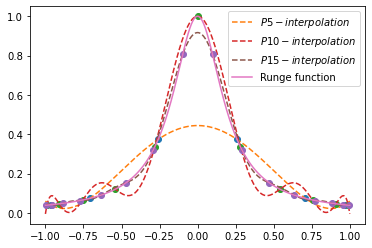

In [3]:
#YOUR ANSWER HERE
def chebyshev(k):
    iter=np.arange(1,k+2,1) #[1,...,k+1]
    ti=[math.cos((2*i-1)*np.pi/(2*k+2)) for i in iter]
    return ti
for k in [5,10,15]:
    xi = chebyshev(k)
    yi = [Runge(x) for x in xi]
    qk = interpolate.lagrange(xi, yi)
    plt.plot(xi,yi,'o')
    plt.plot(X,qk(X),'--',label=r'$P%d-interpolation $'%(k))
plt.plot(X,Y,label='Runge function')
plt.legend(loc='upper right')
plt.show()

# (c)
Verify numerically that the maximum of the difference of $f$ and $q_k$ in the interval $[-1,1]$ decreases with increasing $k$ by trying various values of $k$.

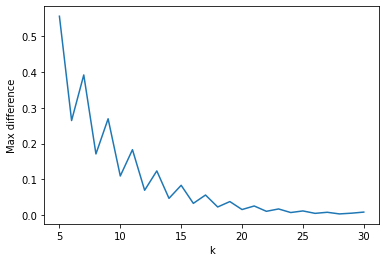

In [4]:
#YOUR ANSWER HERE
maxdiff=[]
kk=np.arange(5,31,1) #[5,6,7,...,30]

for k in kk:
    xi = chebyshev(k)
    yi = [Runge(x) for x in xi]
    qk = interpolate.lagrange(xi, yi)
    diff = np.abs(qk(X) - Runge(X))
    maxdiff.append(np.max(diff))

plt.plot(kk,maxdiff)
plt.xlabel('k')
plt.ylabel('Max difference')
plt.show()

# Exercise 2
The *gamma function* is defined by
$$ \Gamma(x) = \int_0^\infty t^{x-1} e^{-t} \, dt , \qquad x>0.
$$
In this exercise you will study the numerical evaluation of this integral. You are asked to first truncate the integral at $t = L$ (to have a finite integration interval, see book section 8.4.2) and then use a composite Simpson's method to evaluate the resulting integral. We denote $f(t) = t^{x-1} e^{-t}$. For definiteness we will take $x=5$. 

Note that for integers $\Gamma(n) = (n-1)!$ and that $\Gamma(x)$ is implemented in the Python math library, so that the true value of the integral is available for comparison purposes.

The truncation error is the error incurred by truncating the interval of integration to a finite interval.

(We will not explore other methods such as adaptive integration and Gauss-Laguerre quadrature.)


# (a)
There are two types of errors in the approximation the of the above given improper integral: The truncation error and the error in the numerical integration over the finite interval. When only a limited number $n$ of function evaluations is available the parameter $L$ needs to be carefully chosen. Both very large and very small values of $L$ will lead to large overall errors. Which of the two types of errors is large when $L$ is large, which one when $L$ is small? Why?




YOUR ANSWER HERE

Given the same number of evalutions $n$, large L leads to small truncation error and large numerical integration error. When $L\rightarrow \infty$, the estimated integration is closer to real integration. As for interpolation, larger L leads to larger subinterval, thus the polynomial interpolation yields larger error. Small L leads to large truncation error and small numerical integration error.

# (b)
Write python code to compute the integral of $f$ over a given interval using the composite Simpson's rule using $n$ function evaluations. Test your code by integrating $f$ over $[0,32]$ using 33 function evaluations.

In [5]:
# your program here

In [6]:
def f(x):
    return np.power(x,4)*np.exp(-x)

def simpson(x,y):
    return (y-x)*(f(x)+4*f((x+y)/2)+f(y))/6
    

#each subinterval only have 3 points(simpson method)
def composite_simpson(a,b,n):
    k=(n-1)/(3-1)
    h=(b-a)/k
    #print(h)
    x_j=[a+i*h for i in range(int(k+1))]
    #print(x_j)
    result=[simpson(x_j[i],x_j[i+1]) for i in range(int(k))]
    #print(result)
    return np.sum(result)

print('Simpson:',composite_simpson(0,32,33))
print('Real value:',math.factorial(4))

Simpson: 23.96216400583066
Real value: 24


# (c)
Now vary $L$, keeping $n$ constant. You may choose $L = 2^K$ with $K$ an integer. Make a loglog plot of the overall error as a function of $L$. For what $L$ is the overall error minimal? What is the total error in this case? Use $n=65$ function evaluations. 


[23.91216367626679, 22.736327595299308, 15.092086399309139, 2.3911779403292925, 0.009629071588900473, 0.0010318707796770354, 0.037835979019746446, 0.094857178781389, 5.372060994835401, 9.303946579895207, 23.84266428053165]


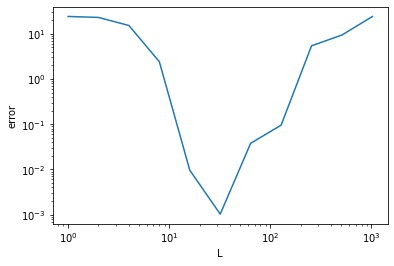

Minimum error: 0.0010318707796770354


In [7]:
# your program here
K= np.linspace(0,10,11)
L_list=[2**int(i) for i in K]

result=[composite_simpson(0, i, 65) for i in L_list]
error=[np.abs(math.factorial(4)-i) for i in result]
print(error)

plt.loglog(L_list, error)
plt.xlabel("L")
plt.ylabel("error")
plt.show()
print('Minimum error:',np.min(error))

For $L=2^5=32$, we have overall error minimal, which is 0.0010318707796770354.